# Biomodels

Some models to look at:
BIOMD0000000482
BIOMD0000000474
BIOMD0000000449
BIOMD0000000448
BIOMD0000000379
BIOMD0000000356
BIOMD0000000349

In [29]:
import tellurium as te
import libsbml

## BIOMD0000000482 - Noguchi2013 - Insulin dependent glucose metabolism

https://www.ebi.ac.uk/biomodels/BIOMD0000000482

Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4039368/ - The selective control of glycolysis, gluconeogenesis and glycogenesis by temporal insulin patterns


Parameters:

Variables:

Time scale: 

In [2]:
noguchi2013 = te.loadSBMLModel('https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000482.2?filename=BIOMD0000000482_url.xml')

In [3]:
noguchi2013.resetToOrigin()
print(noguchi2013.getAntimony())

// Created by libAntimony v2.13.2
model *MODEL1301020001()

  // Compartments and Species:
  compartment default, Vex, Vin;
  species GP in default, pGP in default, mRNA in default, PEPCK in default;
  species IRS in default, p1IRS in default, p2IRS in default, p1p2IRS in default;
  species Akt in default, pAkt in default, mTOR in default, pmTOR in default;
  species Foxo in default, pFoxo in default, PYRout in Vex, GLCex in Vex;
  species F16P in Vin, PYRin in Vin, LAC in Vin, OAA in Vin, GLY in Vin, G1P in Vin;
  species G6P in Vin;

  // Reactions:
  v1: GLCex -> G6P; (V1*(GLCex/K1) - V1*(G6P/K1))/(1 + GLCex/K1 + G6P/K1);
  v2: pAkt + G6P -> pAkt + F16P; ((1 + s1*pAkt)*V2_G6P*G6P/K2_G6P - V2_F16P*F16P/K2_F16P)/(1 + G6P/K2_G6P + F16P/K2_F16P);
  v3: F16P => PYRin; V3*F16P/(K3 + F16P);
  v4: PYRin -> LAC; (V4_PYR*PYRin/K4_PYR - V4_LAC*LAC/K4_LAC)/(1 + PYRin/K4_PYR + LAC/K4_LAC);
  v5: PYRout -> PYRin; (V5*PYRout/K5 - V5*PYRin/K5)/(1 + PYRout/K5 + PYRin/K5);
  v6: PYRin => OAA; V6*PYRi

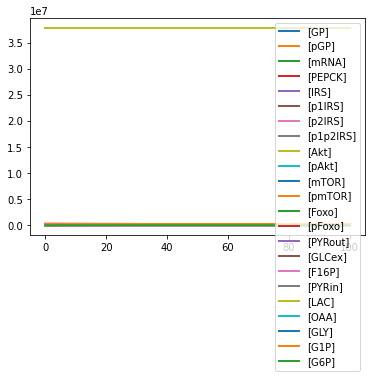

In [28]:
results = noguchi2013.simulate(0, 100, 1000)
noguchi2013.plot(results)

In [4]:
noguchi2013.getFloatingSpeciesIds()

['GP',
 'pGP',
 'mRNA',
 'PEPCK',
 'IRS',
 'p1IRS',
 'p2IRS',
 'p1p2IRS',
 'Akt',
 'pAkt',
 'mTOR',
 'pmTOR',
 'Foxo',
 'pFoxo',
 'PYRout',
 'GLCex',
 'F16P',
 'PYRin',
 'LAC',
 'OAA',
 'GLY',
 'G1P',
 'G6P']

In [6]:
noguchi2013.pGP

0.1723

In [19]:
import libsbml

In [33]:
noguchi2013_sbml = libsbml.readSBMLFromString(noguchi2013.getSBML())
model = noguchi2013_sbml.getModel()

In [34]:
model.getNumSpecies()

23

In [36]:
model.getNumCVTerms()

9

In [37]:
model.

<libcombine.SBaseList; proxy of <Swig Object of type 'ListWrapper< SBase > *' at 0x7fae4687b570> >